In [320]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

### Problem 1

In [321]:
#1.
df_p1 = pd.read_csv('Problem1_DataSet.csv',parse_dates = ['Month'])
df_p1.head()

,Month,"Miles, in Millions"
0,1964-01-01,7.269
1,1964-02-01,6.775
2,1964-03-01,7.819
3,1964-04-01,8.371
4,1964-05-01,9.069


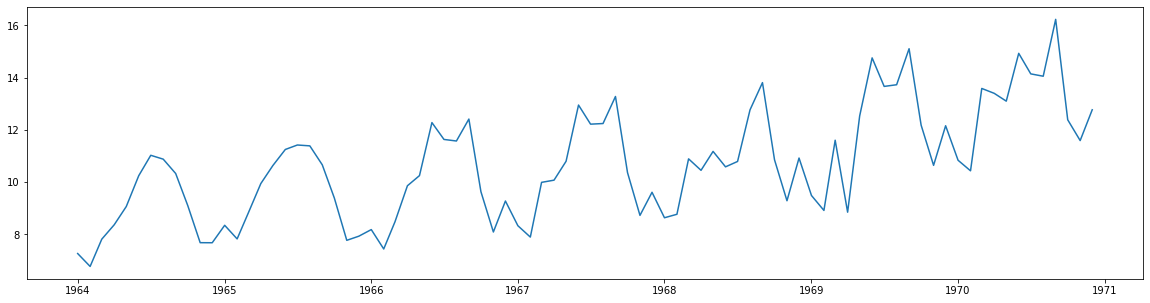

In [322]:
plt.plot(df_p1['Month'],df_p1['Miles, in Millions'])
plt.show()

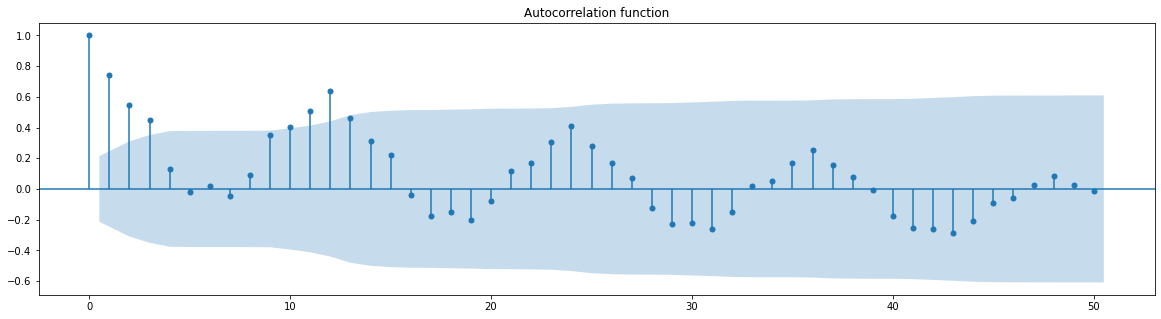

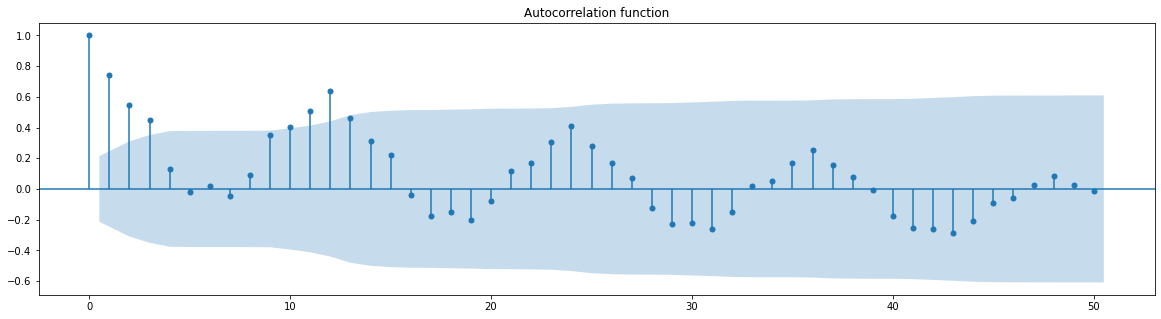

In [323]:
#2.
plot_acf(df_p1['Miles, in Millions'], lags=50, title='Autocorrelation function')

Seasonal period is about 12

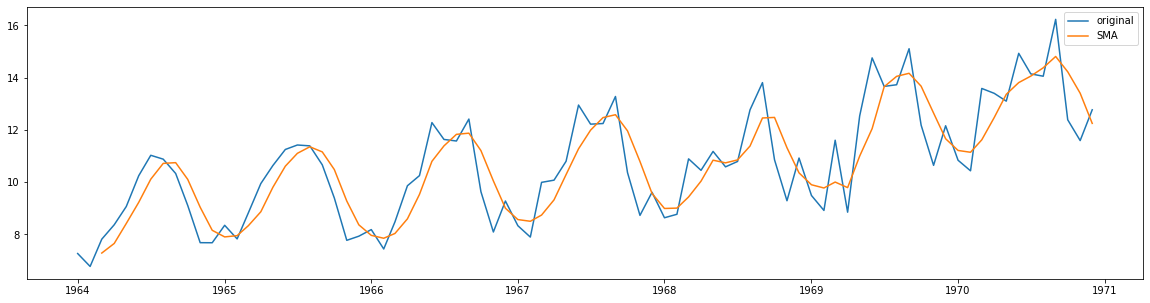

In [324]:
#3.
window_size = 3
df_sma = df_p1['Miles, in Millions']
sma = df_sma.rolling(window_size).mean()
sma = sma[window_size-1:]
plt.plot(df_p1['Month'],df_p1['Miles, in Millions'], label="original")
plt.plot(df_p1['Month'][window_size-1:], sma, label="SMA")
plt.legend()
plt.show()

In [325]:
#mean_squared_error(df_p1['Miles, in Millions'][window_size-1:],sma)

Window size can be 3

#### 4. the trend line is increasing

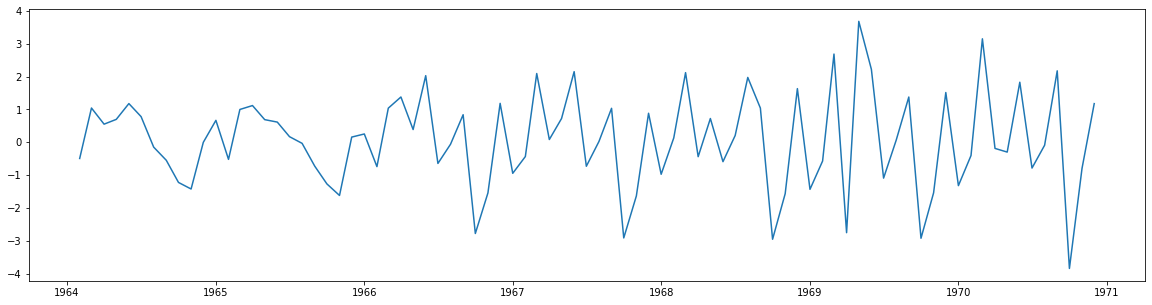

In [326]:
#5.
df_p1_dif = df_p1['Miles, in Millions'].diff(periods=1)
df_p1_dif = df_p1_dif.dropna()
plt.plot(df_p1['Month'][1:],df_p1_dif)

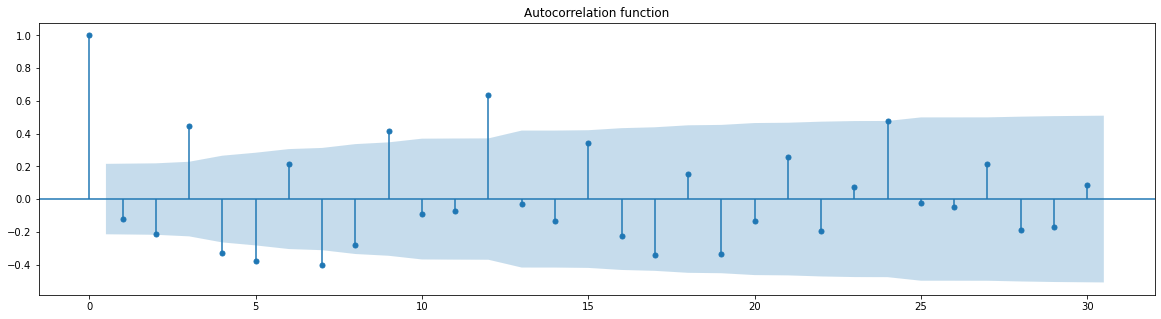

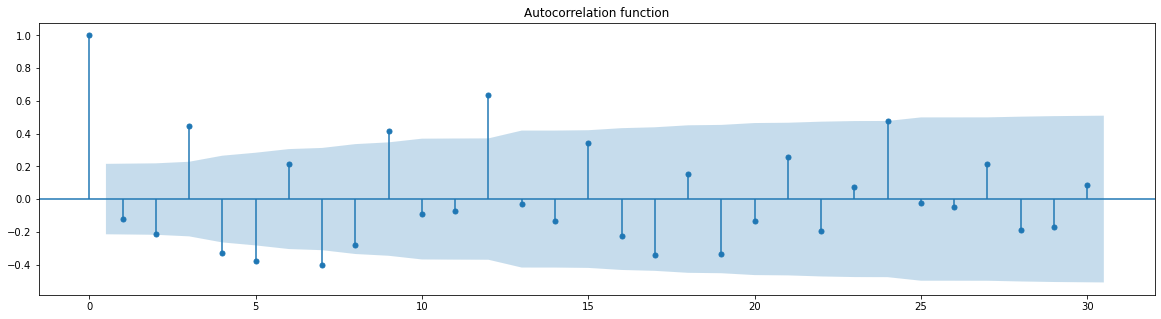

In [327]:
plot_acf(df_p1_dif, lags=30, title='Autocorrelation function')

/Users/shenxuanyu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


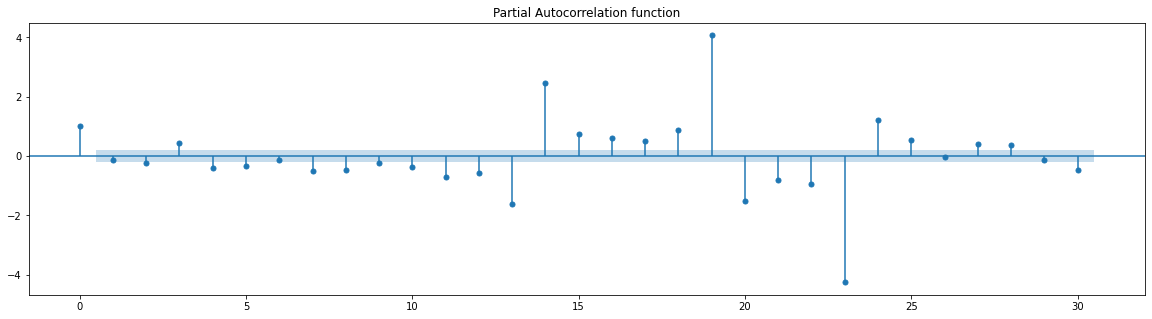

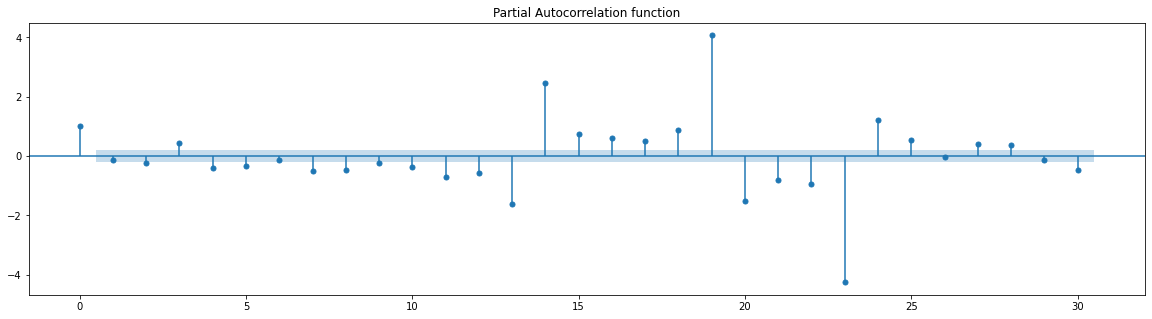

In [328]:
plot_pacf(df_p1_dif, lags=30, title='Partial Autocorrelation function')

#### No significant lag due to no cutoff

In [329]:
#6.
df_seasonal = df_p1_dif - df_p1_dif.shift(12)
df_seasonal = df_seasonal.dropna()
df_seasonal

13   -0.027
14   -0.044
15    0.567
16   -0.008
17   -0.564
      ...  
79   -0.154
80    0.798
81   -0.920
82    0.745
83   -0.338
Name: Miles, in Millions, Length: 71, dtype: float64

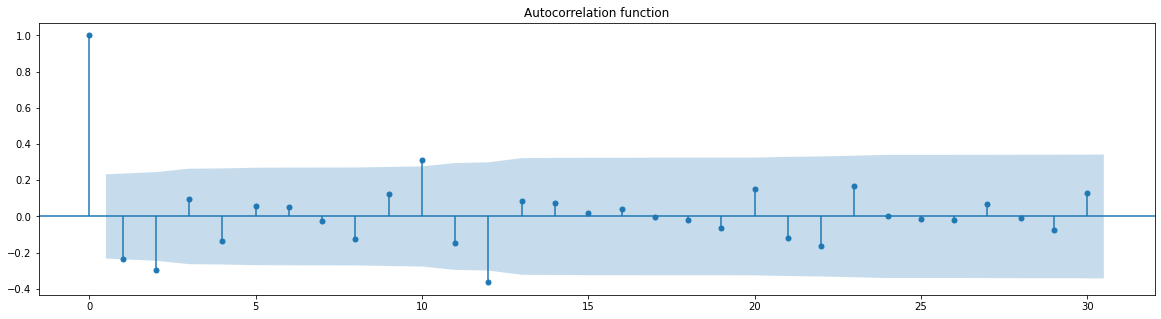

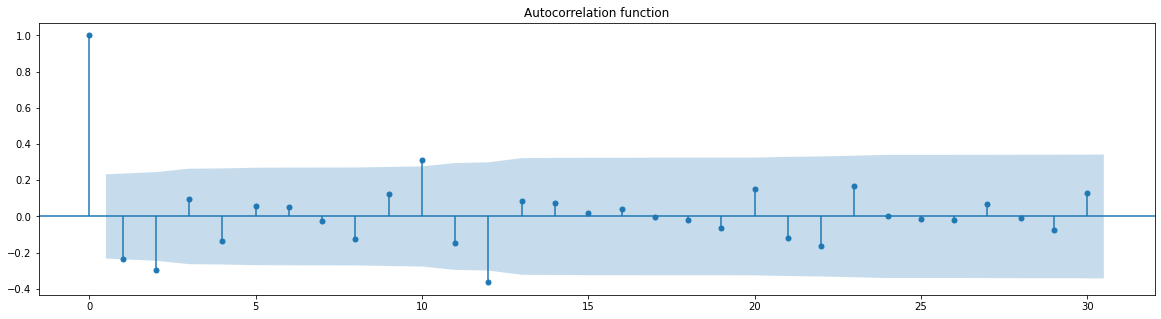

In [330]:
plot_acf(df_seasonal, lags=30, title='Autocorrelation function')

/Users/shenxuanyu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


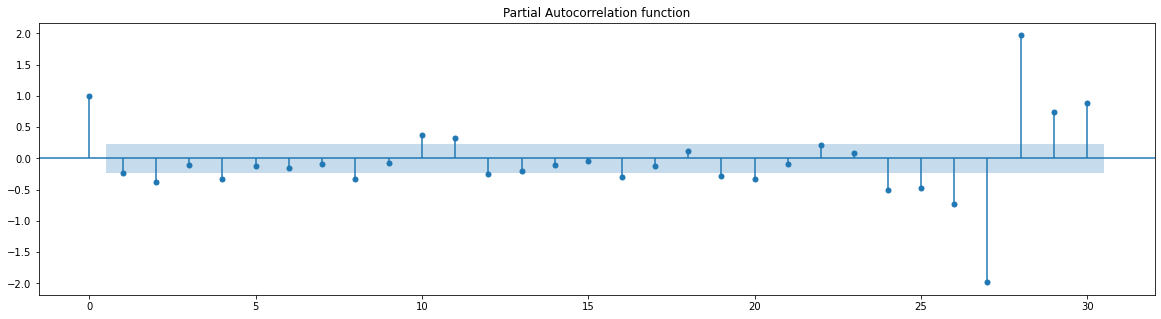

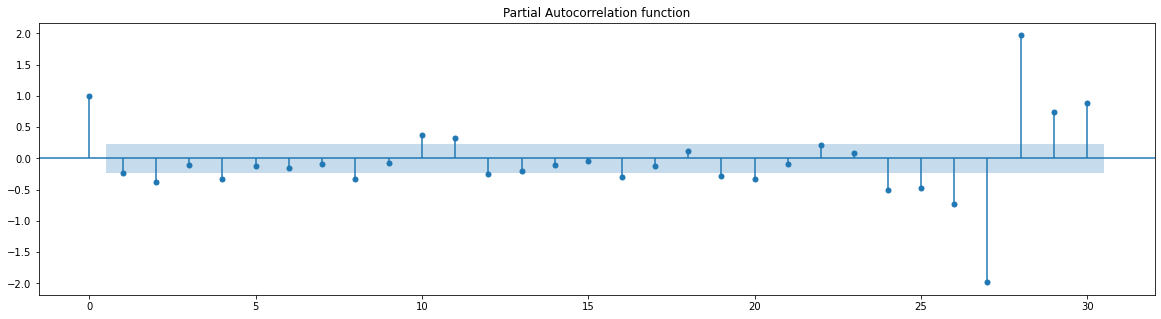

In [331]:
plot_pacf(df_seasonal, lags=30, title='Partial Autocorrelation function')

#### Significant lag can be 2

In [332]:
#7.
#a.
#find the train years
df_p1['Year'] = df_p1['Month'].dt.year
df_p1[df_p1['Year'] == 1969].index

Int64Index([60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71], dtype='int64')

In [333]:
def modeltest(data):
    aicbic = []
    for p in range(4):
        for q in range(4):
            for P in range(4):
                for Q in range(4):
                    
                    model = SARIMAX(data, order=(p, 1, q),seasonal_order=(P,1,Q,12))
                    fitted=model.fit()
                    forc = fitted.forecast(12)
                    mse = mean_squared_error(df_p1['Miles, in Millions'][72:],forc)
                    aicbic.append((p,q,P,Q, fitted.aic, fitted.bic, mse))
                    #print(results.aic)
                    
    return aicbic

In [ ]:
resultlis = modeltest(df_p1['Miles, in Millions'][:72])

In [337]:
result_df = pd.DataFrame(resultlis, columns=['p', 'q', 'P', 'Q', 'AIC', 'BIC', 'MSE'])


# Print result_df in order of increasing MSE
print(result_df.sort_values('AIC'))


     p  q  P  Q         AIC         BIC           MSE
21   0  1  1  1  144.025664  152.335813  40572.616655
180  2  3  1  0  147.283529  161.826291      0.739464
177  2  3  0  1  147.796310  162.339073      0.730333
36   0  2  1  0  148.968651  157.278801      1.065066
33   0  2  0  1  149.224977  157.535127      1.017596
..  .. .. .. ..         ...         ...           ...
7    0  0  1  3  170.538633  180.926321      0.798246
79   1  0  3  3  172.408452  189.028751      0.664043
11   0  0  2  3  172.533948  184.999173      0.816951
14   0  0  3  2  172.533949  184.999173      0.798725
15   0  0  3  3  174.533948  189.076710      0.808409

[256 rows x 7 columns]


#### Based on the results, p = 2, q = 3, P=1, Q=0 is a great model based on AIC

In [348]:
model1 = SARIMAX(df_p1['Miles, in Millions'][:72], order=(2, 1, 3),seasonal_order=(1,1,0,12))
fitted = model1.fit()
forc = fitted.forecast(12)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.89726D-01    |proj g|=  2.04935D-01

At iterate    5    f=  9.62159D-01    |proj g|=  1.44183D-02

At iterate   10    f=  9.55028D-01    |proj g|=  8.92840D-02

At iterate   15    f=  9.33624D-01    |proj g|=  2.19812D-02

At iterate   20    f=  9.28824D-01    |proj g|=  1.66884D-02


 This problem is unconstrained.



At iterate   25    f=  9.25891D-01    |proj g|=  6.13286D-03

At iterate   30    f=  9.25702D-01    |proj g|=  2.48328D-03

At iterate   35    f=  9.25614D-01    |proj g|=  3.02499D-03

At iterate   40    f=  9.25586D-01    |proj g|=  6.25565D-04

At iterate   45    f=  9.25581D-01    |proj g|=  4.57989D-04

At iterate   50    f=  9.25580D-01    |proj g|=  5.08437D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     63      1     0     0   5.084D-04   9.256D-01
  F =  0.92558006316678365     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/Users/shenxuanyu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


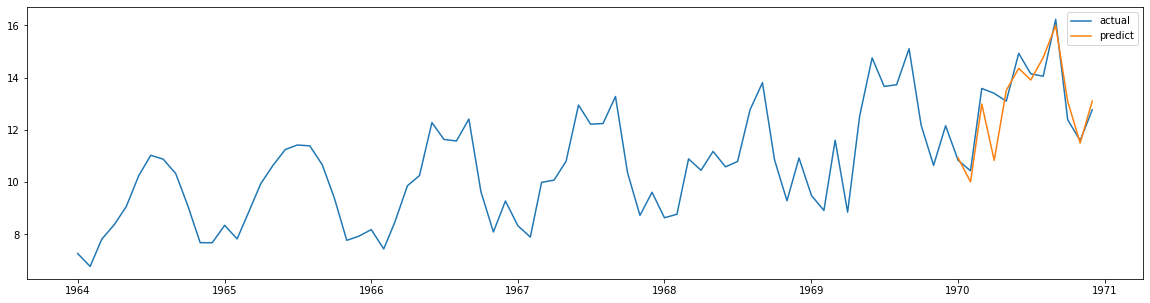

In [349]:
plt.plot(df_p1['Month'], df_p1['Miles, in Millions'], label='actual')
plt.plot(df_p1['Month'][72:], forc, label='predict')
plt.legend()
plt.show()

In [350]:
mean_squared_error(df_p1['Miles, in Millions'][72:],forc)

0.7394638609392316

#### Comparing to the actual value, predict data successfully predicted the seasonal patterns and increasing trends of the data. However, the process of increasing during the seasonal pattern is somehow deviated from the actual value. The MSE is 0.74, which is a fair number of mean square error.

### Problem 2

In [529]:
df2 = pd.read_csv('TotalWine.csv', parse_dates=["Time (Quarter)"])
df2.head()

,Time (Quarter),TotalWine
0,1,1.486
1,2,1.915
2,3,1.844
3,4,2.808
4,5,1.287


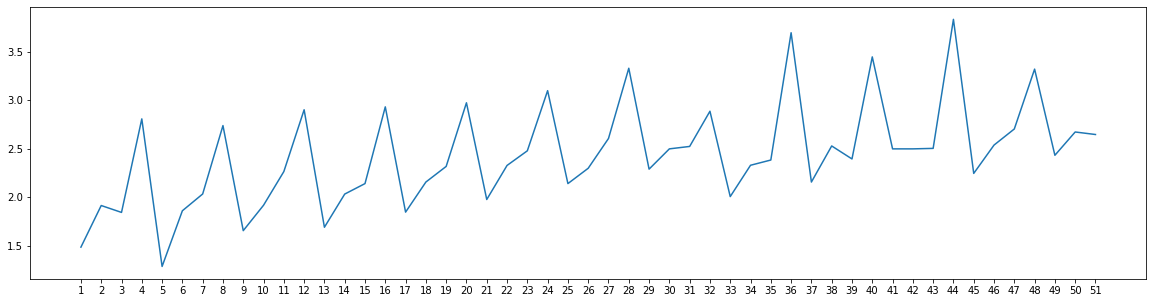

In [530]:
#a
from matplotlib.pyplot import figure

plt.plot(df2['Time (Quarter)'], df2["TotalWine"])
plt.rcParams["figure.figsize"] = (20,5)
plt.show()

Seasonal period is 4

In [490]:
#b
def seasondif(data, m):
    
    df2_seasonal = data - data.shift(m)
    #df2_seasonal = df2_seasonal.dropna()
    df2_copy = df2.copy()
    df2_copy['TotalWine'] = df2_seasonal
    
    return df2_copy

def plot(data):
    
    for lag in [1,2,4,6]:
        newdata = seasondif(data['TotalWine'],lag)
        plt.plot(newdata['Time (Quarter)'], newdata["TotalWine"], label=lag)
        plt.rcParams["figure.figsize"] = (20,5)
    plt.legend()
    plt.show()

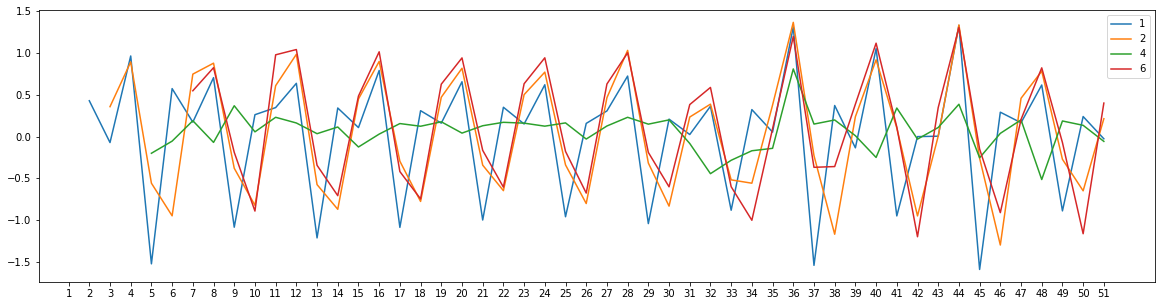

In [491]:
plot(df2)

Lags = 4

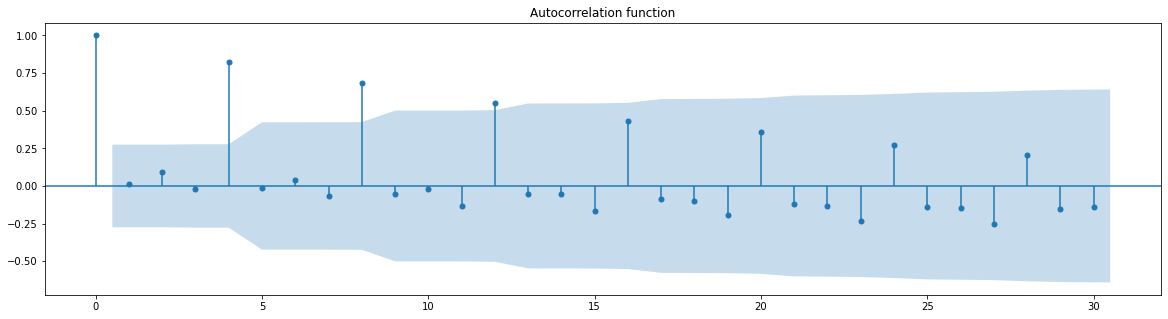

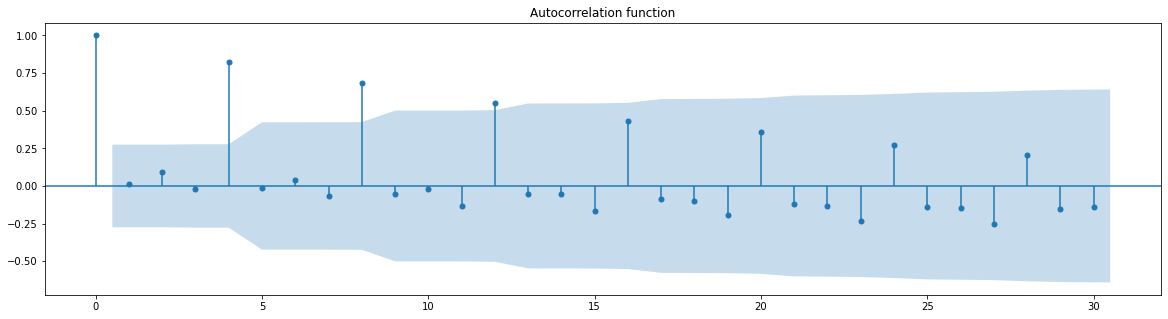

In [430]:
#c 
#need refresh from the beginning
plot_acf(df2['TotalWine'], lags=30, title='Autocorrelation function')

Seasonal period = 4

In [531]:
#d
from statsmodels.tsa.ar_model import ar_select_order
from statsmodels.tsa.ar_model import AutoReg

lagselect = ar_select_order(df2['TotalWine'], maxlag=10, seasonal=True, period=4)
# def select_order(data):
#     aiclist = []
#     for p in range(1,11):
#         res = AutoReg(data, lags=p, seasonal=True, period=4).fit()
#         aiclist.append(res.aic)
#     minaic = min(aiclist)
#     return aiclist.index(minaic)
lagselect.ar_lags

/Users/shenxuanyu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


array([1, 2, 3])

In [532]:
aiclist = []
for p in [1,2,3]:
    res = AutoReg(df2['TotalWine'], lags=p, seasonal=True, period=4).fit()
    aiclist.append((p,res.aic))
    #minaic = min(aiclist)
aiclist

[(1, -3.0500203775771784), (2, -3.228029749333296), (3, -3.279103857970337)]

Lag=3 is the best fit

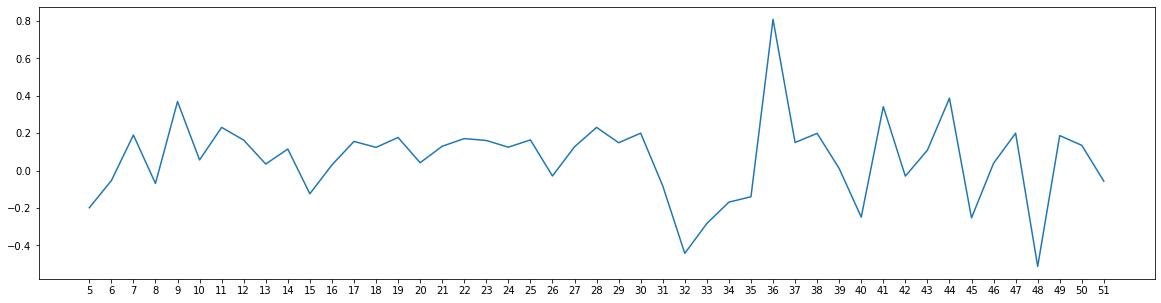

In [533]:

df_season = seasondif(df2['TotalWine'],4)
df_season = df_season.dropna()
plt.plot(df_season['Time (Quarter)'],df_season['TotalWine'])

In [541]:
#e
res = AutoReg(df_season['TotalWine'], lags=3).fit()
pred = res.predict(start=3, end=len(df2)-1)

/Users/shenxuanyu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/shenxuanyu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


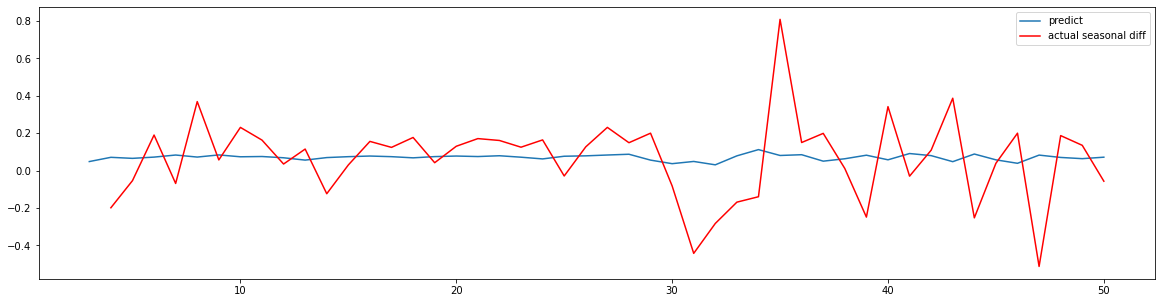

In [539]:
plt.plot(pred, label='predict')
plt.plot(df_season['TotalWine'], color='red',label='actual seasonal diff')
plt.legend()
plt.show()

In [536]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(df2['TotalWine'][3:], pred)

2.406101026688811